In [1]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    from threeML import *

import sys
sys.path.append("../py")
from DMModels import *

import matplotlib.pyplot as plt

Configuration read from /home/tyapici/.threeML/threeML_config.yml



WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



In [2]:
spec = DMAnnihilationFlux()
Dmax_M87     = 18.0183296204
spec.mass    = 1000.
spec.J       = np.power(10.,Dmax_M87)
spec.tau.bounds  = (1e20,1e30)
spec.tau         = 1e25
spec.process     = 1
spec.channel     = 4
spec.sigmav.fix  = True
spec.J.fix       = True
spec.process.fix = True


WARNING RuntimeWarning: Warning: a z value is below interpolation range, zmin = 0.01



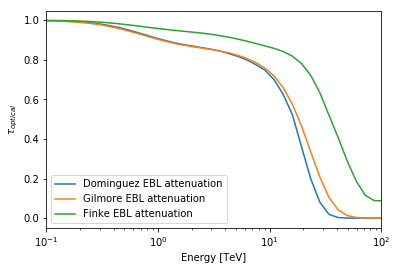

In [3]:
plt.clf()
mass = 100000.
spec.mass = mass
xx = np.logspace(8, np.log10(mass*1e7)) # in keV

ebl = EBLattenuation()
ebl.redshift = 0.0042
ebl.set_ebl_model(modelname='dominguez')
att_dominguez = ebl.evaluate(x=xx, redshift=0.0042)
plt.semilogx(xx/1e9, att_dominguez, label="Dominguez EBL attenuation")
ebl.set_ebl_model(modelname='gilmore')
att_gilmore = ebl.evaluate(x=xx, redshift=0.0042)
plt.semilogx(xx/1e9, att_gilmore, label="Gilmore EBL attenuation")
ebl.set_ebl_model(modelname='finke')
att_finke = ebl.evaluate(x=xx, redshift=0.0042)
plt.semilogx(xx/1e9, att_finke, label="Finke EBL attenuation")
plt.xlim(0.1, mass/1e3)
plt.xlabel("Energy [TeV]")
plt.ylabel(r"$\tau_{optical}$")
plt.legend()
plt.savefig("EBL.png")
plt.show()

In [4]:
spec = DMAnnihilationFlux()
Dmax_M87     = 18.0183296204
spec.J       = np.power(10.,Dmax_M87)
spec.tau.bounds  = (1e20,1e30)
spec.tau         = 1e25
spec.process     = 1
spec.channel     = 4
spec.sigmav.fix  = True
spec.J.fix       = True
spec.process.fix = True

def plot_for_mass(mass, style):
    plt.clf()
    
    spec.mass = mass
    xx = np.logspace(8, np.log10(mass*1e7)) # in keV

    spec.unset_EBL_model()
    f1 = spec.evaluate(channel=4, mass=1000., J=10**25.93, sigmav=1e-23, x=xx, process=1, tau=1e25)

    spec.set_EBL_model('gilmore', 0.002)
    f2 = spec.evaluate(channel=4, mass=1000., J=10**25.93, sigmav=1e-23, x=xx, process=1, tau=1e25)

    spec.set_EBL_model('dominguez', 0.002)
    f3 = spec.evaluate(channel=4, mass=1000., J=10**25.93, sigmav=1e-23, x=xx, process=1, tau=1e25)

    spec.set_EBL_model('finke', 0.002)
    f4 = spec.evaluate(channel=4, mass=1000., J=10**25.93, sigmav=1e-23, x=xx, process=1, tau=1e25)

    plt.loglog(xx/1e9, f1, label="intrinsic", color='black', linestyle=style)
    plt.loglog(xx/1e9, f2 ,label="w/ Gilmore EBL model", color='red', linestyle=style)
    plt.loglog(xx/1e9, f3 ,label="w/ Dominguez EBL model", color='green', linestyle=style)
    plt.loglog(xx/1e9, f4 ,label="w/ Finke EBL model", color='blue', linestyle=style)

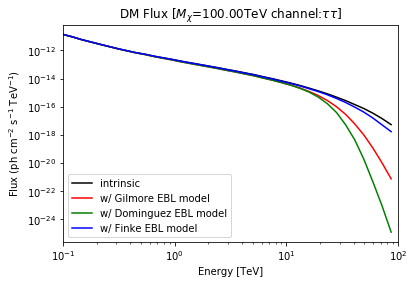

In [5]:
mass = 100000.
spec.channel = 4
plot_for_mass(mass, style='-')
plt.legend()
plt.xlim(0.1, mass/1e3)
if len(spec.print_channel_in_text())>1:
    plt.title(r"DM Flux [$M_\chi$={:.2f}TeV channel:$\{}\{}$]".format(mass/1e3, 
                                                                      spec.print_channel_in_text(),
                                                                      spec.print_channel_in_text()))
else:
    plt.title(r"DM Flux [$M_\chi$={:.2f}TeV channel:{}{}]".format(mass/1e3, 
                                                                  spec.print_channel_in_text(), 
                                                                  spec.print_channel_in_text()))
plt.xlabel("Energy [TeV]")
plt.ylabel(r"Flux (ph cm$^{-2}$ s$^{-1}$ TeV$^{-1}$)")
plt.savefig("DMflux_with_EBL_M_{:.2f}TeV_channel_{}.png".format(mass/1e3, spec.print_channel_in_text()))
plt.show()

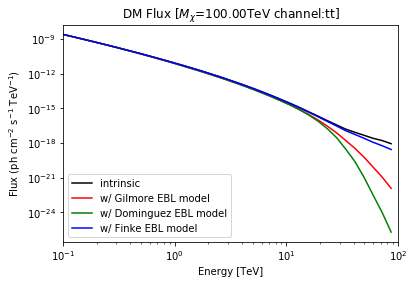

In [6]:
mass = 100000.
spec.channel = 2
plot_for_mass(mass, style='-')
plt.legend()
plt.xlim(0.1, mass/1e3)
if len(spec.print_channel_in_text())>1:
    plt.title(r"DM Flux [$M_\chi$={:.2f}TeV channel:$\{}\{}$]".format(mass/1e3, 
                                                                      spec.print_channel_in_text(),
                                                                      spec.print_channel_in_text()))
else:
    plt.title(r"DM Flux [$M_\chi$={:.2f}TeV channel:{}{}]".format(mass/1e3, 
                                                                  spec.print_channel_in_text(), 
                                                                  spec.print_channel_in_text()))
plt.xlabel("Energy [TeV]")
plt.ylabel(r"Flux (ph cm$^{-2}$ s$^{-1}$ TeV$^{-1}$)")
plt.savefig("DMflux_with_EBL_M_{:.2f}TeV_channel_{}.png".format(mass/1e3, spec.print_channel_in_text()))
plt.show()

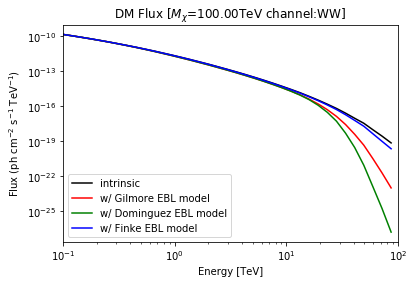

In [7]:
mass = 100000.
spec.channel = 3
plot_for_mass(mass, style='-')
plt.legend()
plt.xlim(0.1, mass/1e3)
if len(spec.print_channel_in_text())>1:
    plt.title(r"DM Flux [$M_\chi$={:.2f}TeV channel:$\{}\{}$]".format(mass/1e3, 
                                                                      spec.print_channel_in_text(),
                                                                      spec.print_channel_in_text()))
else:
    plt.title(r"DM Flux [$M_\chi$={:.2f}TeV channel:{}{}]".format(mass/1e3, 
                                                                  spec.print_channel_in_text(), 
                                                                  spec.print_channel_in_text()))
plt.xlabel("Energy [TeV]")
plt.ylabel(r"Flux (ph cm$^{-2}$ s$^{-1}$ TeV$^{-1}$)")
plt.savefig("DMflux_with_EBL_M_{:.2f}TeV_channel_{}.png".format(mass/1e3, spec.print_channel_in_text()))
plt.show()

In [8]:
spec.print_channel_in_text()

'W'